In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-info">
<b>Задание № 1</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [3]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)


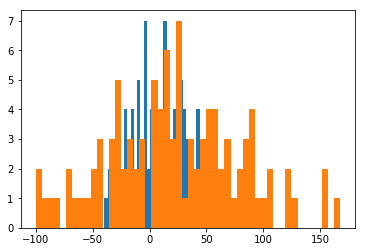

In [13]:
plt.hist(A, bins=50)
plt.hist(B, bins=50)
plt.show()
# визуально данные распределены нормальным образом, проверим это через тест Шапиро

In [14]:
from scipy.stats import shapiro

# Н0 гипотеза Тест Шапиро: случайная величина распределена нормально
# если p-value > alpha, принимаем Н0, значит наша выборка распределена нормально
# если p-value <= alpha, отклоняем Н0, наша выборка распределена НЕнормально
s, p = shapiro(A)
print('Statistics control=%.3f, p control=%.3f' % (s, p))
# возьмем уровень значимости в 1% для более точного подсчета
alpha = 0.01
if p > alpha:
    print(f'Распределение control нормально, p > alpha,  (принимаем H0, данные распределены нормальным образом)')
else:
    print(f'Распределение control ненормально, p <= alpha, (отвергаем H0, данные распределены ненормальным образом)')

s, p = shapiro(B)
print('Statistics variant=%.3f, p variant=%.3f' % (s, p))
# возьмем уровень значимости в 1% для более точного подсчета
alpha = 0.01
if p > alpha:
    print(f'Распределение variant нормально, p > alpha,  (принимаем H0, данные распределены нормальным образом)')
else:
    print(f'Распределение variant ненормально, p <= alpha, (отвергаем H0, данные распределены ненормальным образом)')

Statistics control=0.995, p control=0.967
Распределение control нормально, p > alpha,  (принимаем H0, данные распределены нормальным образом)
Statistics variant=0.992, p variant=0.848
Распределение variant нормально, p > alpha,  (принимаем H0, данные распределены нормальным образом)


In [15]:
# Применим t-test для выборок, так как распределение нормальное
stats.ttest_ind(A, B) # применяем тест Стьюдента
# даже при стат значимости в 0.05, наши выборки не имеют различия, так как p > alpha

Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)

In [21]:
from scipy.stats import mannwhitneyu
mannwhitneyu(A, B)
# наши выборки не имеют различия, так как p > alpha

MannwhitneyuResult(statistic=4343.0, pvalue=0.054347680446611354)

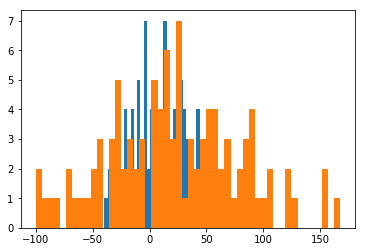

In [16]:
# так же это видно визально, что средние выборок находятся в одном значении по x
plt.hist(A, bins=50)
plt.hist(B, bins=50)
plt.show()

<div class="alert alert-info">
<b>Задание № 2</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [28]:
np.random.seed(11)
A = stats.norm.rvs(scale=24, loc=11, size=1000)
B = A + stats.norm.rvs(scale=54, loc=11, size=1000)

# Ваш код.
from scipy.stats import mannwhitneyu
mannwhitneyu(A, B)

MannwhitneyuResult(statistic=420692.0, pvalue=4.084787199471427e-10)

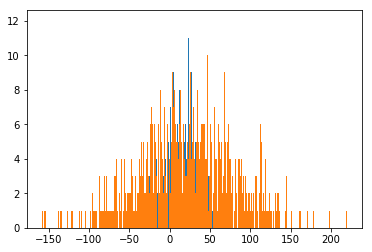

In [27]:
# Немного изменил выборку, что бы было более значимое различие и применил тест Мана Уитни
plt.hist(A, bins=500)
plt.hist(B, bins=500)
plt.show()
# В данном случам видно, что различие в выборках более очевидное

<div class="alert alert-info">
<b>Задание № 3</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [1]:
from scipy.stats import f_oneway 

water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral = [2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# применяем к выборкам метод дисперсионного анализа
F, p = f_oneway(water, nutri, mineral)  

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты 

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')
    
    
# эффект есть, так как p-value < alpha

12.525963044834192 2.9240047906326866e-05
Разное распределение (отклоняем H0)


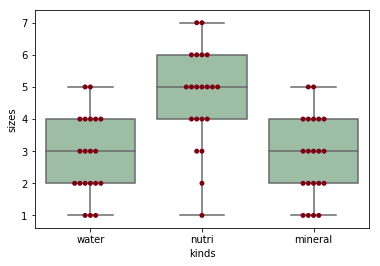

In [8]:
import seaborn as sns  

sizes = water + nutri + mineral
kinds = ['water']*len(water) + ['nutri']*len(nutri) + ['mineral']*len(mineral)
df_mid = pd.DataFrame()
df_mid['sizes'] = sizes
df_mid['kinds'] = kinds

ax = sns.boxplot(x='kinds', y='sizes', data=df_mid, color='#99c2a2')
ax = sns.swarmplot(x="kinds", y="sizes", data=df_mid, color='#7d0013')
plt.show()

